In [ ]:
knitr::opts_chunk$set(echo = TRUE)

# Libraries

In [1]:
library(Seurat)
library(reshape2)
library(tidyverse)
library(ggplot2)
library(ggsignif)
library(dplyr)
library(viridis)
library(ComplexHeatmap)
library(genefilter)

Warning message:
“package ‘Seurat’ was built under R version 4.0.3”
Attaching SeuratObject

Registered S3 method overwritten by 'cli':
  method     from    
  print.boxx spatstat

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.0.3”
Warning message:
“package ‘tibble’ was built under R version 4.0.3”
Warning message:
“package ‘readr’ was built under R version 4.0.3”
Warning message:
“package ‘dplyr’ was built under R version 4.0.3”
Warning message:
“package ‘forcats’ was built under R version 4.0.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘ggsignif’ was built under R version 4.0.3”
Loading required package

# Myeloid subclustering

Use pbmc object for subclustering - these subclustering steps are optional to reproduce the myeloid analysis, as the fully processed myeloid dataset is provided below. To run the following pre-processing steps, please download the pbmc dataset (Ramaswamy2021_MIS-C_10x_PBMC)

In [ ]:
#misc.pbmc <- readRDS("shared/FG_uploads/misc_pbmc_final_upload.rds") 

Subset for platelets, pDC and myeloid cells

In [ ]:
# myeloid <- subset(misc.pbmc, idents = c(2,8,12,15,21,23,24,25,27))
# Idents(myeloid) <- "orig.ident"

Re-integrate the object, with sample 10 and 14 as reference:

In [ ]:
# DefaultAssay(myeloid) <- "RNA"
# myeloid[["integrated"]] <- NULL
# myeloid.list <- SplitObject(myeloid, split.by = "orig.ident")
# myeloid.list <- myeloid.list[c("NS1A","NS1B","TS2A","TS2B","TS3A","TS3B","TP9B","NS0A", "NS0B","Y111-1","Y113-1", "HD_35F","HD_32M","HD_36M","NC-13F","Y117-1", "Y117-R","Y124-1","Y124-R","Y125-1","Y127-1","Y129-1","Y28-2", "Y28-4","Y29-2","Y54-4", "Y70-4","HA5876","HA5877","HA5894", "HA5952","HA5957","HA5953","C39","C32","C27","C33","TP8B")]
# for (i in 1:length(myeloid.list)) {
#   myeloid.list[[i]] <- NormalizeData(myeloid.list[[i]], verbose = FALSE)
#   myeloid.list[[i]] <- FindVariableFeatures(myeloid.list[[i]], selection.method = "vst",
#                                             nfeatures = 2000, verbose = FALSE)
# }
# myeloid.anchors <- FindIntegrationAnchors(object.list = myeloid.list, dims = 1:30, reference =c(10,14))
# myeloid.integrated <- IntegrateData(anchorset = myeloid.anchors, dims = 1:30)
# DefaultAssay(myeloid.integrated) <- "integrated"

Run the standard workflow for visualization and clustering:

In [ ]:
# myeloid.integrated <- ScaleData(object = myeloid.integrated)
# myeloid.integrated <- RunPCA(object = myeloid.integrated)
# ElbowPlot(object = myeloid.integrated, ndims = 25)
# myeloid.integrated <- FindNeighbors(object = myeloid.integrated, dims = 1:20)
# myeloid.integrated <- FindClusters(object = myeloid.integrated, resolution = 0.5)
# myeloid.integrated <- RunUMAP(object = myeloid.integrated, dims = 1:20)

Definition of cell type per cluster:

In [ ]:
# DefaultAssay(myeloid.integrated) <- "RNA"
# myeloid.integrated <- ScaleData(object = myeloid.integrated)
# myeloid.integrated.markers <- FindAllMarkers(object = myeloid.integrated, min.pct = 0.25, logfc.threshold = 0.25)
# myeloid.integrated.markers_roc <- FindAllMarkers(object = myeloid.integrated, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25, test.use = "roc")
# VlnPlot(object = myeloid.integrated, features = c('FCGR3A', 'CD14', 'S100A9', 'TUBB1', 'PPBP', 'PF4'), pt.size = 0.2)
# VlnPlot(object = myeloid.integrated, features = c('ZBTB46', 'CD1C', 'ITGAX', 'CLEC4C','LILRA4','FCER1A'), pt.size = 0.2)
# VlnPlot(object = myeloid.integrated, features = c('CD4','CD8A','CD3E','IL7R', 'CCR7', 'S100A4'), pt.size = 0.2)
# VlnPlot(object = myeloid.integrated, features = c('FCGR3A','NCAM1', 'GNLY', 'NKG7', 'CD3E', 'CD8A'), pt.size = 0.2)
# VlnPlot(object = myeloid.integrated, features = c('CD4','CD8A','CD3E','IL7R', 'CCR7', 'S100A4'), pt.size = 0.2)
# VlnPlot(object = myeloid.integrated, features = c('FCGR3A','NCAM1','GNLY', 'KLRB1', 'PRF1', 'GZMA'), pt.size = 0.2)
# VlnPlot(object = myeloid.integrated, features = c('MS4A1','CD79A', 'IGHG2', 'CD38', 'CD27', 'IGHD'), pt.size = 0.2)

Filter out contaminants and final visualization:


In [ ]:
# DefaultAssay(myeloid.integrated) <- "RNA"
# myeloid.integrated.filtered <- subset(x = myeloid.integrated, idents = c(0,1,2,3,4,7,9,11,12,15))
# DimPlot(object = myeloid.integrated.filtered, reduction = 'umap', label = TRUE)
# 
# new.cluster.ids <- c("Neutrophils I", "Neutrophils II","Classical Monocytes I",
#                      "Classical Monocytes II", "Non Classical Monocytes",
#                      "Intermediate Monocytes", "Conventional DC", "Plasmacytoid DC",
#                      "ISG+ Myeloid Cells", "Bad Quality Cells")
# 
# names(x = new.cluster.ids) <- levels(x = myeloid.integrated.filtered)
# myeloid.integrated.filtered <- RenameIdents(object = myeloid.integrated.filtered, new.cluster.ids)
# plot1 <- DimPlot(object = myeloid.integrated.filtered, reduction = 'umap',
#         cols = c("chartreuse3", "springgreen4",  "plum1", "maroon1", "purple",
#                  "deeppink3","dodgerblue", "deepskyblue1","orchid1",  "dimgrey"))
# plot1 
# ggsave(plot1, file = "shared/FG_uploads/myeloid_umap_test.png")
# 
# table(Idents (object = myeloid.integrated.filtered), myeloid.integrated.filtered@meta.data$condition)
# table(Idents (object = myeloid.integrated.filtered), myeloid.integrated.filtered@meta.data$orig.ident)
# table(Idents (object = myeloid.integrated.filtered), myeloid.integrated.filtered@meta.data$storage)

## Validation with SingleR package:

In [ ]:
# test <- GetAssayData(myeloid.integrated.filtered)
# monaco <- MonacoImmuneData(ensembl=FALSE)

For single cells

In [ ]:
# annot <- SingleR(test = test, ref = monaco, labels = monaco$label.fine)
# myeloid.integrated.filtered[["SingleR.labels"]] <- annot$labels
# DimPlot(myeloid.integrated.filtered, reduction = "umap",pt.size =0.05,
#         group.by = "SingleR.labels", cols = c("maroon1", "purple",  "springgreen4",  "dodgerblue","deepskyblue1"))

For defined clusters

In [ ]:
# myeloid.integrated.filtered.sce <- as.SingleCellExperiment(myeloid.integrated.filtered, assay = 'integrated')
# annot_clust <- SingleR(test = myeloid.integrated.filtered.sce,
#                        ref = monaco, labels = monaco$label.fine,
#                        method = "cluster",clusters=myeloid.integrated.filtered.sce$seurat_clusters)
# 
# myeloid.integrated.filtered[["SingleR.cluster.labels"]] <- annot_clust$labels[match(myeloid.integrated.filtered[[]][["seurat_clusters"]], rownames(annot_clust))]
# DimPlot(myeloid.integrated.filtered, reduction = "umap",pt.size =0.05,
#         group.by = "SingleR.cluster.labels",
#         cols = c("maroon1", "purple",  "springgreen4",  "dodgerblue","deepskyblue1"))

#myeloid.int <- subset(myeloid.integrated.filtered, idents = c("Bad Quality Cells", "ISG+ Myeloid #Cells"), invert = TRUE)

# Dot Plot

Here we read in the processed myeloid data set resulting from the subclustering analysis above

In [2]:
misc.myeloid <- readRDS("/fastgenomics/data/dataset_0001/misc_myeloid_final_upload.rds") 



Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



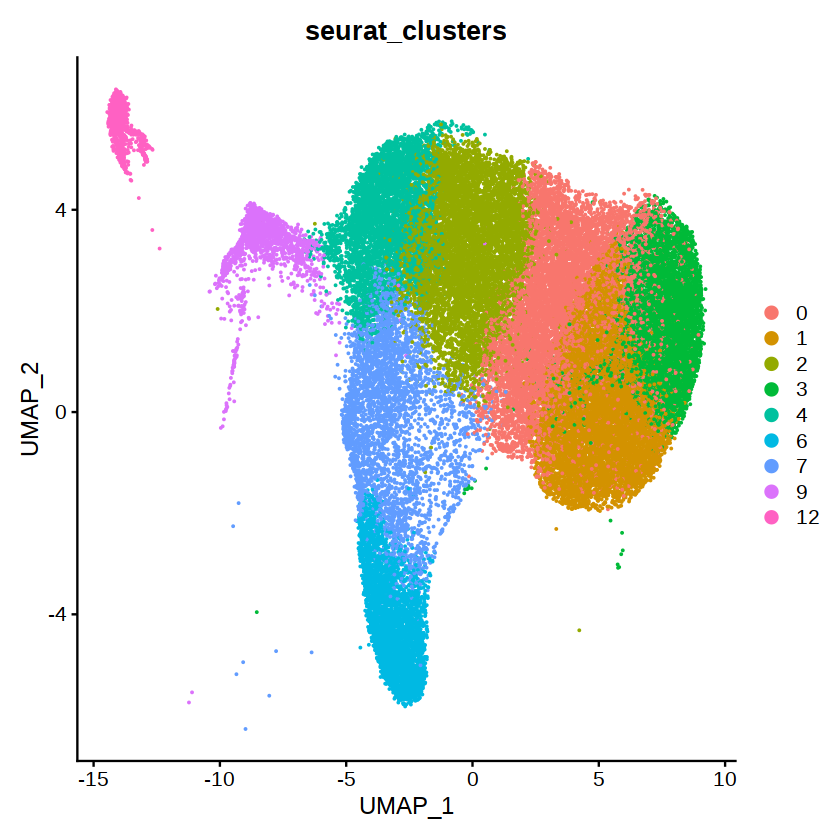

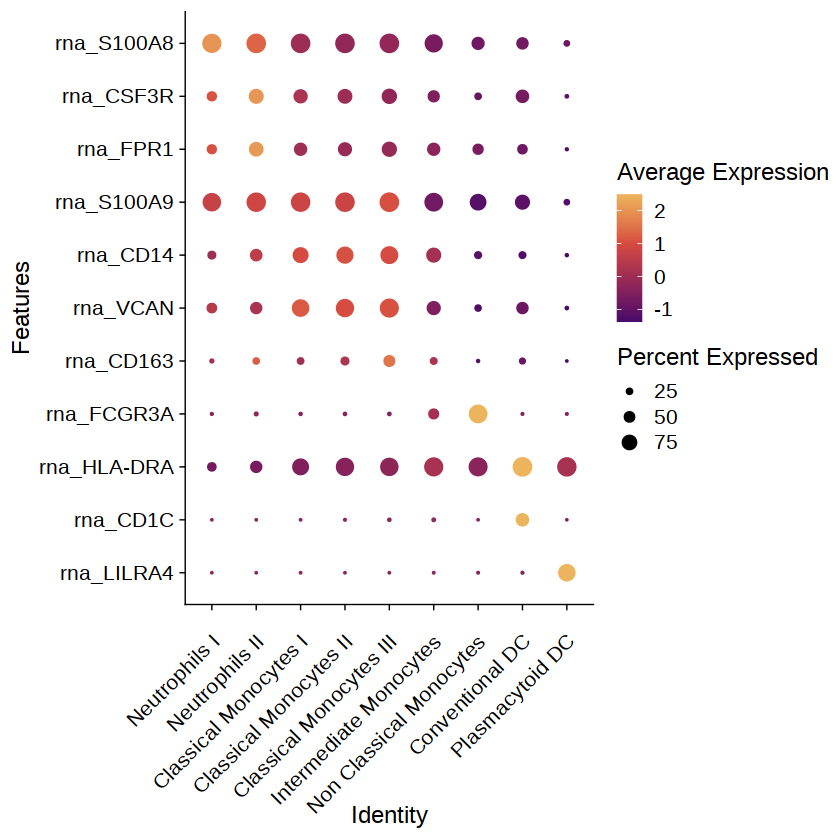

In [3]:
DimPlot(misc.myeloid, reduction = "umap", group.by = "seurat_clusters")
features.myeloid <- c("rna_S100A8", "rna_CSF3R", "rna_FPR1", "rna_S100A9", 
                      "rna_CD14", "rna_VCAN", "rna_CD163", "rna_FCGR3A",
                      "rna_HLA-DRA", "rna_CD1C", "rna_LILRA4")

Idents(misc.myeloid) <- "FinalAnnotation"

inferno_mod <- inferno(20)[3:18]

dot <- DotPlot(misc.myeloid, features = rev(features.myeloid),  
               assay = "RNA", dot.scale = 4.5)+ 
  scale_color_gradient2(low = inferno_mod[3], mid = "#D64B40FF", high = "#F1ED6FFF", midpoint = 1) +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1, size = 12),
        axis.line = element_line(size = 0.3), axis.ticks = element_line(size = 0.3)) + 
  coord_flip()

dot

In [4]:
misc.myeloid <- ScaleData(object = misc.myeloid, assay = "RNA")

Centering and scaling data matrix



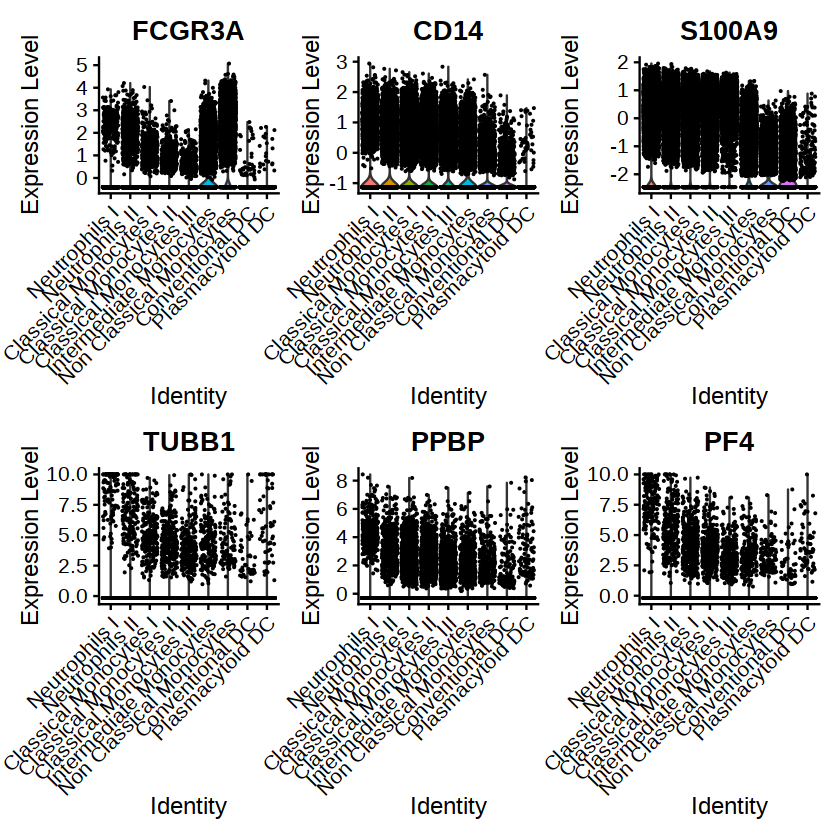

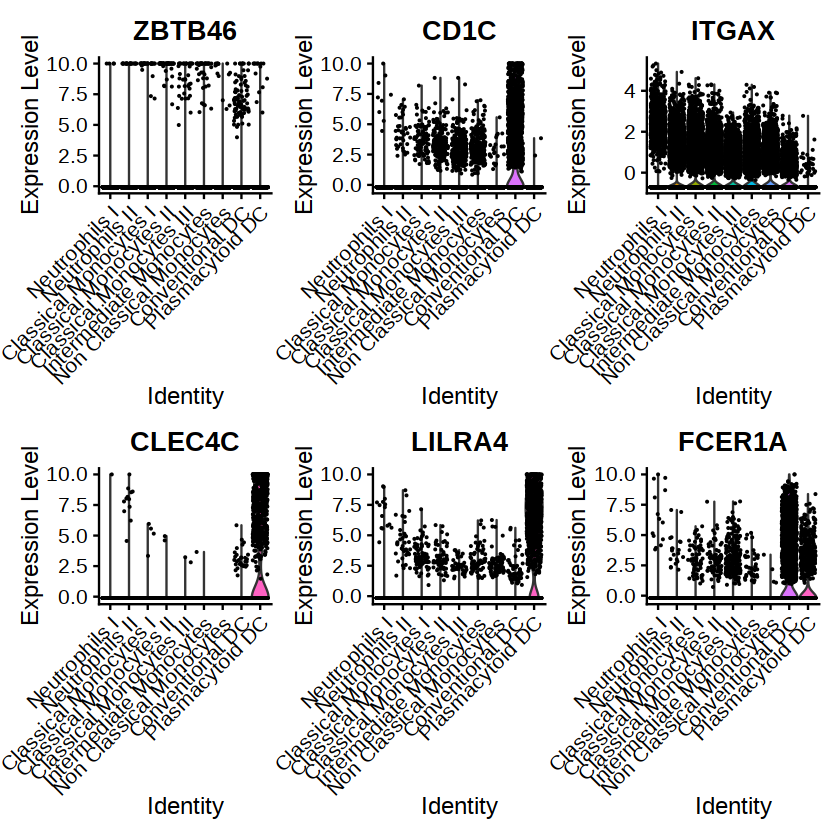

In [4]:
VlnPlot(object = misc.myeloid, features = c('FCGR3A', 'CD14', 'S100A9', 'TUBB1', 'PPBP', 'PF4'), assay = "RNA", slot = "scale.data")
VlnPlot(object = misc.myeloid, features = c('ZBTB46', 'CD1C', 'ITGAX', 'CLEC4C','LILRA4','FCER1A'), assay = "RNA", slot = "scale.data")

Subset on the population of interest. One example is just monocytes and neutrophils

In [3]:
misc.sub.myeloid <- subset(misc.myeloid, idents = c("Classical Monocytes I", "Classical Monocytes II", 
                                                    "Classical Monocytes III", "Intermediate Monocytes",
                                                    "Non Classical Monocytes", "Neutrophils I",
                                                    "Neutrophils II"))

## Alarmin Module score

In [4]:
alarmin <- list(c("S100A8", "S100A9", "S100A12"))

misc.cluster <- AddModuleScore(misc.sub.myeloid, name = "Alarmin_score", nbins=24, ctrl=100,
                               features = alarmin, assay = "RNA") #not scaled

cols <- c("#6baed6", "#c94040", "#FC9272", "#969696", "#9970ab", "#ec7014", "#fec44f")


Idents(misc.cluster) <- "condition_new"
misc.peds <- subset(misc.cluster, idents = c("C.HD", "MIS-C", "MIS-C-R"))
misc.adult <- subset(misc.cluster, idents = c("A.HD", "COVID19-A", "COVID19-B"))

meta <- misc.peds[[]]
df_score <- data.frame('sample' = meta$sample_id, 'score' = meta$Alarmin_score1, 
                       'cluster' = meta$annotation, 'condition' = meta$condition_new)
head(df_score)

,sample,score,cluster,condition
,<chr>,<dbl>,<chr>,<chr>
1,P1.1,4.908528,Neutrophils,MIS-C
2,P1.1,5.857713,Classical monocytes,MIS-C
3,P1.1,6.104093,Neutrophils,MIS-C
4,P1.1,5.764117,Neutrophils,MIS-C
5,P1.1,5.138293,Classical monocytes,MIS-C
6,P1.1,5.547088,Classical monocytes,MIS-C


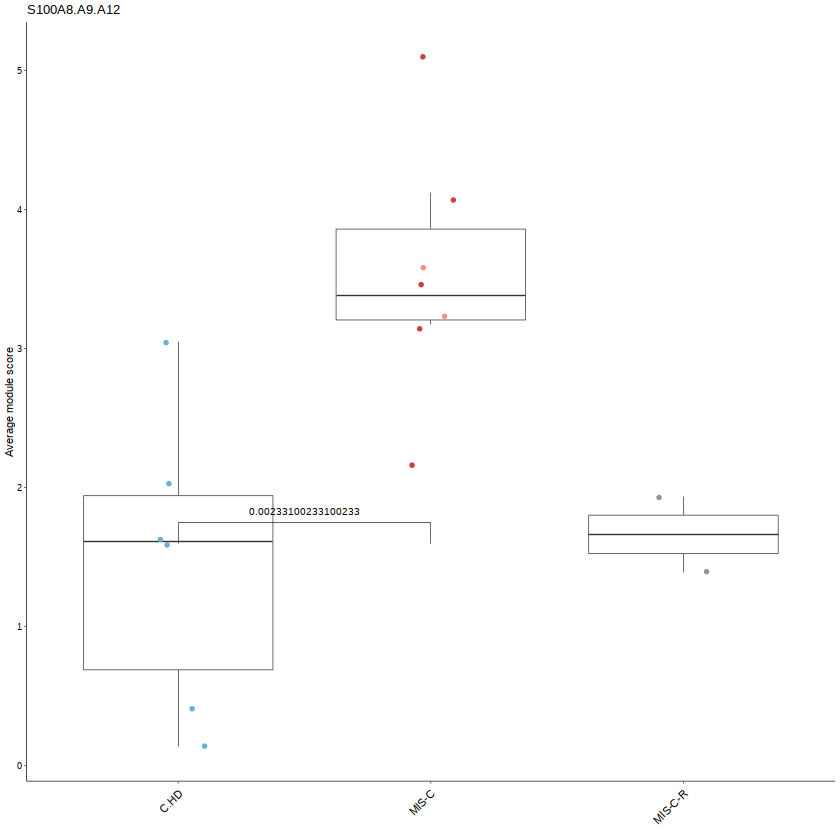

In [5]:
cyto <- df_score

names <- unique(cyto$sample)
means <- data.frame("name" = rep(NA,38), "value" = rep(NA,38))

for(i in 1:length(names)){
  cyto_tmp <- cyto %>% filter(sample == names[i])
  means[i,1] <- names[i]
  means[i,2] <- mean(cyto_tmp[,2])
}


means[means$name %in% c("P1.1", "P2.1", "P3.1", "P4.1",
                        "P5.1", "P6.1", "P7.1"), 'condition'] <- 'MIS-C'

means[means$name %in% c("C.HD1", "C.HD2", "C.HD3", 
                        "C.HD4", "C.HD5", "C.HD6"), 'condition'] <- 'C.HD'

means[means$name %in% c("P3.2", "P4.2"), 'condition'] <- 'MIS-C-R'

means_severe <- means %>% filter(name %in% c("P1.1", "P2.1", "P3.1", "P6.1", "P7.1"))


level_order <-  c("C.HD", "MIS-C", "MIS-C-R")

means <- na.omit(means)

means$condition <- factor(means$condition, level = level_order)
means_severe$condition <- factor(means_severe$condition, level = level_order)

misc_tmp <- means %>% filter(condition == "MIS-C")
chd_tmp <- means %>% filter(condition == "C.HD")


# Example

w.test <- wilcox.test(x = chd_tmp$value, y = misc_tmp$value, alternative = c("two.sided"), correct = FALSE)
pval <- w.test$p.value


cols <- c("#6baed6", "#FC9272", "#969696", "#9970ab", "#ec7014", "#fec44f")

means2 <- means %>% filter(!(name %in% c("P1.1", "P2.1", "P3.1", "P6.1", "P7.1")))

plot1 <- ggplot(means, aes(x = condition, y = value)) +
  geom_boxplot(lwd=0.15, outlier.shape = NA) +
  geom_jitter(data=means_severe, colour ="#c94040",  size = 0.5, width = 0.12)+
  geom_jitter(data = means2, aes(colour = factor(condition, level = level_order)), 
              size = 0.5, width = 0.12) +
  ggtitle("S100A8.A9.A12") +
  xlab("") +
  scale_color_manual(values = cols) +
  geom_signif(comparisons = list(c("C.HD", "MIS-C")), annotation = pval, 
              size = 0.12, textsize = 2,
              y_position =1.5)+
  theme_classic(base_size = 6) +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1, size = 6, color = "black"),
        axis.text.y = element_text(color = "black"), axis.line = element_line(size = 0.15), 
        legend.position = "none", axis.ticks = element_line(size = 0.15), ) +
  ylab("Average module score")

plot1

## HLA score

In [3]:
misc.mono <- subset(misc.myeloid, idents = c("Classical Monocytes I", "Classical Monocytes II", 
                                                    "Classical Monocytes III", "Intermediate Monocytes",
                                                    "Non Classical Monocytes"))

hla <- list(c("HLA-DPA1","HLA-DPB1","HLA-DQA1","HLA-DQA2",
              "HLA-DQB1","HLA-DRA","HLA-DRB1","HLA-DRB5"))

misc.cluster <- AddModuleScore(misc.mono, name = "HLA_score", nbins=24, ctrl=100,
                               features = hla, assay = "RNA") #not scaled

cols <- c("#6baed6", "#FC9272", "#c94040", "#969696", "#9970ab", "#ec7014", "#fec44f")
cols2 <- c("#9970ab", "#ec7014", "#fec44f")

Idents(misc.cluster) <- "condition_new"
misc.peds <- subset(misc.cluster, idents = c("C.HD", "MIS-C", "MIS-C-R"))
misc.adult <- subset(misc.cluster, idents = c("A.HD", "COVID19-A", "COVID19-B"))

meta <- misc.peds[[]]
df_score <- data.frame('sample' = meta$sample_id, 'score' = meta$HLA_score1, 
                       'cluster' = meta$annotation, 'condition' = meta$condition_new)

## Individual genes (peds)

In [ ]:
# Monocytes
Idents(misc.mono) <- "condition_new"
misc.peds <- subset(misc.mono, idents = c("C.HD", "MIS-C", "MIS-C-R"))
misc.adult <- subset(misc.mono, idents = c("A.HD", "COVID19-A", "COVID19-B"))
misc.peds <- ScaleData(misc.peds, assay = "RNA")
misc.adult <- ScaleData(misc.adult, assay = "RNA")


# Making table
Idents(misc.peds) <- "sample_id"
avg.out <- AverageExpression(misc.peds, assays = "RNA", 
                             slot= "scale.data", 
                             features = c("CD86")) #remember to scale

avg.df <- avg.out$RNA




Centering and scaling data matrix



In [ ]:
## Plotting individual genes locally

gene <- avg.df
gene_t <- as.data.frame(t(as.matrix(gene)))
gene_t$sample <- rownames(gene_t)

# Peds

gene_t[gene_t$sample %in% c("P1.1", "P2.1", "P3.1", "P4.1", "P5.1", "P6.1", "P7.1"), 'condition'] <- 'MIS-C'

gene_t[gene_t$sample %in% c("C.HD1", "C.HD2", "C.HD3", "C.HD4", "C.HD5", "C.HD6"), 'condition'] <- 'C.HD'

gene_t[gene_t$sample %in% c("P3.2", "P4.2"), 'condition'] <- 'MIS-C-R'

gene_severe <- gene_t %>% filter(sample %in% c("P1.1", "P2.1", "P3.1", "P6.1", "P7.1"))

gene_chd <- gene_t %>% filter(condition == "C.HD")
gene_misc <- gene_t %>% filter(condition == "MIS-C")


# Wilcox

w.test <- wilcox.test(x = gene_chd$CD86, y = gene_misc$CD86, alternative = c("two.sided"), correct = FALSE)
pval_cd86 <- w.test$p.value


# Levels
gene_t$condition <- factor(gene_t$condition, levels = c("C.HD", "MIS-C", "MIS-C-R"))
gene_severe$condition <- factor(gene_severe$condition, levels = c("C.HD", "MIS-C", "MIS-C-R"))


cols <- c("#6baed6", "#FC9272", "#969696", "#9970ab", "#ec7014", "#fec44f")

gene_t_2 <- gene_t %>% filter(!(sample %in% c("P1.1", "P2.1", "P3.1", "P6.1", "P7.1")))


plot1 <- ggplot(gene_t, aes(x = condition, y = CD86)) +
  geom_boxplot(lwd=0.15, outlier.shape = NA) +
  geom_jitter(data=gene_severe, colour ="#c94040",  size = 0.5, width = 0.12) +
  geom_jitter(data = gene_t_2, aes(colour = condition), size = 0.5, width = 0.12) +
  ggtitle("CD86") +
  xlab("") +
  scale_color_manual(values = cols) +
  geom_signif(comparisons = list(c("C.HD", "MIS-C")), annotation = pval_cd86, 
              size = 0.12, textsize = 2,
              y_position = 1)+
  theme_classic(base_size = 6) +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1, size = 6, color = "black"),
        axis.text.y = element_text(color = "black"), axis.line = element_line(size = 0.15), 
        legend.position = "none", axis.ticks = element_line(size = 0.15)) +
  ylab("Scaled avg. expression")
plot1

# Heatmap for monocytes

In [29]:
misc.mono
markers.mono <- FindMarkers(misc.mono, group.by="condition", ident.1="MIS-C", ident.2="C.HD", assay = "RNA")
head(markers.mono)

markers_mono_up <- markers.mono %>% filter(avg_log2FC > 0.5  & (p_val_adj < 0.05 | p_val_adj == 0))
markers_mono_dn <- markers.mono %>% filter(avg_log2FC < -0.5  & (p_val_adj < 0.05 | p_val_adj == 0))
markers_mono_up <- markers_mono_up %>% arrange(desc(avg_log2FC))
markers_mono_dn <- markers_mono_up %>% arrange(avg_log2FC)
top.markers_mono_up <- head(markers_mono_up, 20)
top.markers_mono_dn <- head(markers_mono_dn, 20)


features.to.use <- c(rownames(top.markers_mono_up), rownames(top.markers_mono_dn))
Idents(misc.mono) <- "sample_id"
avg.topmarkers <- AverageExpression(misc.mono, assays = "RNA", 
                                    features = features.to.use)

col_order <-  c("C.HD1", "C.HD2", "C.HD3", "C.HD4", "C.HD5", "C.HD6",
                "P1.1", "P2.1", "P3.1", "P4.1", "P5.1", "P6.1", "P7.1",
                "P3.2", "P4.2")

avg.topmarkers$RNA <- avg.topmarkers$RNA[, col_order]
avg.markers1 <- data.matrix(avg.topmarkers[[1]])



An object of class Seurat 
19775 features across 29306 samples within 1 assay 
Active assay: RNA (19775 features, 0 variable features)
 1 dimensional reduction calculated: umap

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MARCKSL1,0,-1.958837,0.127,0.603,0
SMAP2,0,1.229068,0.652,0.245,0
C1orf162,0,1.374336,0.827,0.457,0
TXNIP,0,1.209232,0.869,0.534,0
S100A9,0,1.538959,0.995,0.860,0
S100A12,0,1.768148,0.881,0.680,0


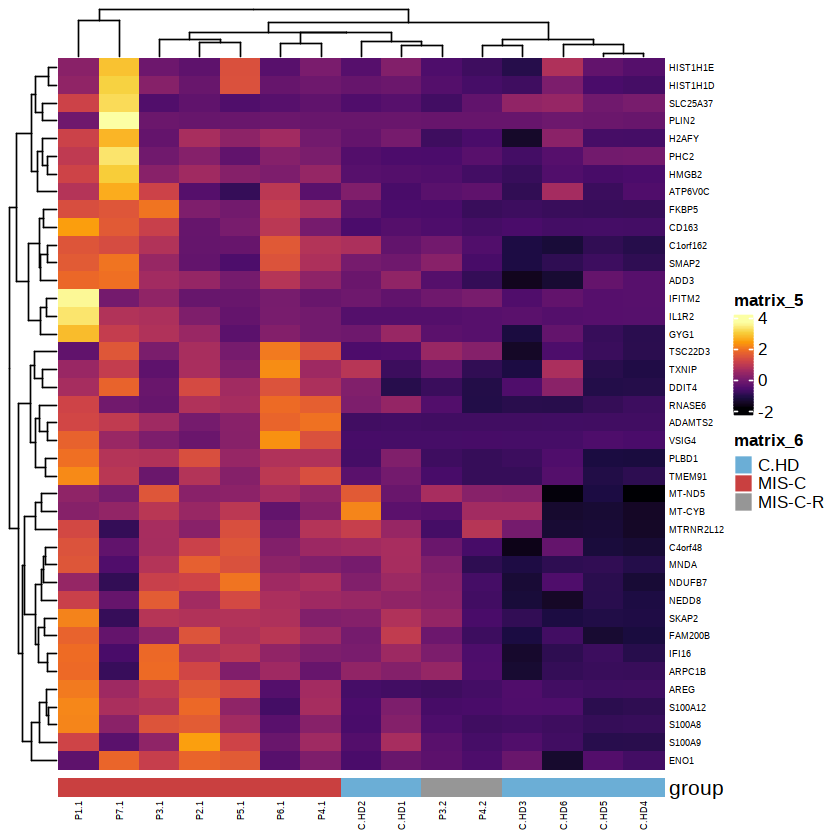

In [30]:
avg.markers1 <- genescale(avg.markers1, axis=1, method="Z")


col_groups1 <- c(rep("C.HD",6), rep("MIS-C",7), rep("MIS-C-R",2))

annotations <- data.frame(group = col_groups1)
rownames(annotations) <- colnames(avg.topmarkers$RNA)
annotations_t <- t(as.matrix(annotations))
mat_colors <- list(group =  cols <- c("#6baed6", "#c94040", "#969696"))
names(mat_colors$group) <- unique(col_groups1)

# For monocytes
  Heatmap(avg.markers1, col = inferno(10),  row_names_gp = gpar(fontsize = 5, fontfamily = "Helvetica"), 
          column_names_gp = gpar(fontsize = 5, fontfamily = "Helvetica"))  %v% 
  Heatmap(annotations_t, col = mat_colors$group, column_names_gp = gpar(fontsize =5, fontfamily = "Helvetica")) 